# Лабораторная работа 5
##  Задание 1
### Вариант №6
* Чсило уранений n=10000
* Для решения системы использовался метод наискорейшего спуска.
* Точность решения интеграла и системы 0.01 и 0.001 соответственно. 
## Задание 2 
 Для вычисления интеграла с требуемой точностью в задании нужно использовать формулу 3/8. Численное 
нтегрирование по этой формуле сводится к сложению значений функций в узлах сетки с заданными коэффициентами. Приведем ее.

$\ I = \frac{3 h}{8}\sum \limits_{i=1}^{ n} k_i f(x_i)$ , $\ h=\frac{b-a}{n}$, $\ x_i=a+i h $, $\ i= \overline{\strut 0,n}$ 
\begin{equation}
\ n=3 t\ ,  k_i = \begin{cases}
1   &i=0\ , i=n\\
3   &i=3, \overline{\strut 3 t-2, 3 t-1} , t= \overline{\strut 1, \frac{n}{3}} \\
2   &i=2  , t= \overline{1, \frac{n}{3}-1}
\end{cases} 
\end{equation}
Где n - число ячеек сетки, h - шаг сетки, а и b - нижний и верхний пределы соответсвенно.
Построим график величины заданного интеграла для i=10 и вычислим его с точностью до одной тысячной. Точность определется как отношение разности интегралов при n и n-1 ячейках к значению интеграла с n ячейками.

0.029299466549178105 68


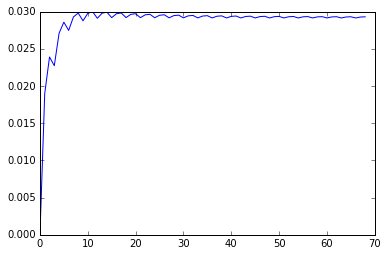

In [3]:
%matplotlib inline
from pylab import *
import math as m
from numpy import linspace
import matplotlib.pyplot as plt
def f(x):
        return (x*x+m.log(x+1))/(1+100*x*x-m.log(1+x))
a=0
b=1
#X = range(1,100)
Y = [0]
eps=1
j=0
Xi=0
U=[0]
I0=0
while(eps>0.001):
    M=0
    j+=1 
    U.append(j)
    for i in range(0, j+1):
            h=(b-a)/j
            if i==0 or i==j:
               k=1
            if i%3!=0:
               k=3
            if i%3==0 and i!=0 and i!=j :
               k=2
            Xi=a+i*h
            #I0=(3*h/8)*k*f(a)
            Inew=(3*h/8)*k*f(Xi)
            M=M+Inew
    Y.append(M)  
    eps=abs((Y[j]-Y[j-1])/Y[j])
plt.plot(U,Y)#, 'ro')
print(Y[j],j)

show()



In [7]:
import numpy as np
import math as m
n=1000
Intl=([])
for p in range(1,n):
    def f(x):
            return (x*x+m.log(x+1))/(1+p*p*x*x-m.log(1+x))
    v=0
    c=1
    Y = [0]
    eps=1
    j=0
    Xi=0
    U=[0]
    I0=0
    while(eps>0.01):
        M=0
        j+=1 
        
        for i in range(0, j+1):
                h=(c-v)/j
                if i==0 or i==j:
                   k=1
                if i%3!=0:
                   k=3
                if i%3==0 and i!=0 and i!=j :
                   k=2
                Xi=v+i*h
                #I0=(3*h/8)*k*f(a)
                Inew=(3*h/8)*k*f(Xi)
                M=M+Inew
        Y.append(M)  
        eps=abs(Y[j]-Y[j-1])/Y[j]
    Intl.append(Y[j]) 
#  Int это вектор значений интегралов


m=3
# Создаём "нулевую" матрицу
a=np.zeros([n,m])
b=np.zeros([n])
x0=np.zeros([n])
U0=[]
# Заполняем матрицу
for i in range(1,n-1) : # цикл до 998 включительно, 998-й-предпоследний элемент
    a[i, 1]=-6-(np.sin(i+1))**2
    #a[i, i]=-6+(i)      
    a[i,0]=2         #a[cтрока, столбец]
    a[i,2]=1
    a[0]=[-6,0,0]
    a[n-1]=[0,0,-6]
    b[i]=-1+Intl[i] #здесь будет вектор из значений интегралов
    x0[i]=0.2# Начальный вектор
#print(a, b)
x0[0]=-6
x0[n-1]=-1
b[0]=0
b[n-1]=-1
nx0=0
r=np.zeros([n])
eps=0.1 ;q=0 ;w=0
t=np.zeros([n]); y=np.zeros([n])
N=[]
U0=x0
U0=list(U0)
p=0
B=0
Bnorm=0
Bvect=[]
for l in range(n):
    B+=(b[l])**2
    
Bnorm=np.sqrt(B)
for l in range(n):
    nx0+=(x0[l])**2
nx0=np.sqrt(nx0)
N.append(nx0)
while(eps>0.001):    
  #  print(1)
    for k in range(1,n-1):  #перемножение матрицы на столбец для нахождения невязки  
        summ=0
        for l in range(m):
            summ+=a[k,l]*x0[l+k-1] #невязка r, временный вектор
       # print(1)
        r[k]=summ-b[k]
        r[0]=a[0][0]*x0[0]
        r[n-1]=a[n-1][2]*x0[n-1]
    #print(r)    
    for k in range(n-1):    
        for l in range(m):
            t[k]+=a[k,l]*r[l+k-1]
           # print(2)
        t[0]=a[0,0]*r[0]
        t[n-1]=a[n-1,m-1]*r[n-1]
        q+=r[k]*r[k]
        w+=t[k]*r[k]
    #q/w итерационный параметр
    u=np.zeros([n])
    u[0]=-((a[0,0])*q/w-1)*x0[0]+(q/w)*b[0]
    u[n-1]=-(((a[n-1][2])*q/w)-1)*x0[n-1]+(q/w)*b[n-1]#((a[n-1,2]-1)*q/w)*x0[n-1]+(q/w)*b[n-1]
    U0.append(u[0])
    for k in range(1,n-1):    
        u[k]+=-((a[k,1])*(q/w)-1)*x0[k]-(a[k,0])*x0[k-1]*(q/w)-(a[k,2])*x0[k+1]*(q/w)+(q/w)*b[k]
        U0.append(u[k])
    U0.append(u[n-1])    
    x0=u  
    for l in range(n):
        nx0+=(U0[(n)*(p)+l]-U0[(n)*(p+1)+l])**2
    nx0=np.sqrt(nx0)
    N.append(nx0)
    p=p+1
    eps=abs(N[p]-N[p-1])#-N[p-1]) 
    razn=0        
    if eps>200:
        break
np.set_printoptions(precision=4,suppress=True,linewidth=250)
med=np.zeros([n])
for i in range(1,n-1): #подставляем вектор решений в систему тюею умножаем матрицу а на столбец x0
    for l in range(0,m):
        med[i]+=a[i][l]*x0[i-1+l]
med[0]=a[0][0]*x0[0]; med[n-1]=a[n-1][m-1]*x0[n-1]
med=med-b; Norma=0
for i in range(0,n):
    Norma+=med[i]**2
Norma=np.sqrt(Norma)
razn=abs(N[p]-Bnorm)  
print(N[p],a,'число итераций', p,x0, 'норма Ax-b', Norma)

1.00079419261 [[-6.      0.      0.    ]
 [ 2.     -6.8268  1.    ]
 [ 2.     -6.0199  1.    ]
 ..., 
 [ 2.     -6.7318  1.    ]
 [ 2.     -6.0007  1.    ]
 [ 0.      0.     -6.    ]] число итераций 14 [ 0.      0.1214  0.2088  0.2317  0.2363  0.2771  0.2714  0.2574  0.2849  0.287   0.2615  0.2858  0.2942  0.2656  0.2827  0.2995  0.2695  0.2789  0.3025  0.2738  0.275   0.3035  0.2787  0.2718  0.3027  0.284   0.2694  0.3002  0.2895  0.2683  0.2966
  0.2948  0.2683  0.2919  0.2994  0.2697  0.2869  0.3029  0.2721  0.2818  0.305   0.2756  0.2772  0.3055  0.28    0.2734  0.3043  0.285   0.2707  0.3016  0.2901  0.2691  0.2976  0.2951  0.2689  0.2928  0.2996  0.27    0.2876  0.3031  0.2723  0.2824
  0.3052  0.2757  0.2777  0.3058  0.28    0.2739  0.3046  0.2848  0.271   0.302   0.29    0.2693  0.2981  0.295   0.269   0.2933  0.2995  0.27    0.288   0.303   0.2722  0.2829  0.3052  0.2755  0.2781  0.3059  0.2798  0.2741  0.3048  0.2846  0.2712
  0.3023  0.2897  0.2695  0.2984  0.2948  0.269   0